In [1]:
import pandas as pd
import numpy as np

In [3]:
players = pd.read_csv('players_22.csv')

In [4]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93.0,93.0,78000000.0,320000.0,34.0,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.0,92.0,119500000.0,270000.0,32.0,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.0,91.0,45000000.0,270000.0,36.0,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91.0,91.0,129000000.0,270000.0,29.0,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91.0,91.0,125500000.0,350000.0,30.0,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11693,241240,https://sofifa.com/player/241240/tatsuya-ito/2...,T. Itō,伊藤 達哉,"LM, RM",64.0,69.0,875000.0,3000.0,24.0,...,32+2,32+2,32+2,44+2,17+2,https://cdn.sofifa.net/players/241/240/22_120.png,https://cdn.sofifa.net/teams/680/60.png,https://cdn.sofifa.net/flags/be.png,NaN,https://cdn.sofifa.net/flags/jp.png
11694,241379,https://sofifa.com/player/241379/odin-bailey/2...,O. Bailey,Odin Bailey,"CAM, CM, RM",64.0,75.0,1300000.0,4000.0,21.0,...,43+2,43+2,43+2,50+2,16+2,https://cdn.sofifa.net/players/241/379/22_120.png,https://cdn.sofifa.net/teams/621/60.png,https://cdn.sofifa.net/flags/gb-sct.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
11695,241404,https://sofifa.com/player/241404/maximiliano-o...,M. Ortiz,Maximiliano Iván Ortiz Cuello,"CB, CDM",64.0,64.0,400000.0,500.0,31.0,...,64,64,64,59+2,16+2,https://cdn.sofifa.net/players/241/404/22_120.png,https://cdn.sofifa.net/teams/110974/60.png,https://cdn.sofifa.net/flags/bo.png,NaN,https://cdn.sofifa.net/flags/bo.png
11696,241415,https://sofifa.com/player/241415/rasmus-wiedes...,R. Wiedesheim-Paul,Håkan Rasmus Wiedesheim-Paul,"ST, LW",64.0,74.0,1300000.0,2000.0,22.0,...,38+2,38+2,38+2,44+2,15+2,https://cdn.sofifa.net/players/241/415/22_120.png,https://cdn.sofifa.net/teams/298/60.png,https://cdn.sofifa.net/flags/no.png,NaN,https://cdn.sofifa.net/flags/se.png


In [5]:
features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [6]:
players = players.dropna(subset=features)

In [7]:
data = players[features].copy()

In [8]:
data

,overall,potential,value_eur,wage_eur,age
0,93.0,93.0,78000000.0,320000.0,34.0
1,92.0,92.0,119500000.0,270000.0,32.0
2,91.0,91.0,45000000.0,270000.0,36.0
3,91.0,91.0,129000000.0,270000.0,29.0
4,91.0,91.0,125500000.0,350000.0,30.0
...,...,...,...,...,...
11692,64.0,70.0,925000.0,2000.0,23.0
11693,64.0,69.0,875000.0,3000.0,24.0
11694,64.0,75.0,1300000.0,4000.0,21.0
11695,64.0,64.0,400000.0,500.0,31.0




1.   Scale data
2.   Initialize random centroids
3. Label each data point
4. update centroids
5. repeat 3 and 4 until centroids stop changing



In [9]:
data = ((data - data.min()) / (data.max() - data.min())) * 9+1

In [11]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000
mean,2.875243,3.630716,1.199776,1.342969,4.644582
std,1.441587,1.602324,0.439190,0.611921,1.419672
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.620690,2.451613,1.043622,1.064378,3.666667
50%,2.551724,3.322581,1.076106,1.141631,4.666667
75%,3.793103,4.774194,1.150356,1.373391,5.666667
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.419355,4.616892,9.227468,7.000000
1,9.689655,9.129032,6.542745,7.939914,6.333333
2,9.379310,8.838710,3.085490,7.939914,7.666667
3,9.379310,8.838710,6.983603,7.939914,5.333333
4,9.379310,8.838710,6.821182,10.000000,5.666667


In [18]:
def random_centropids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [19]:
centroids = random_centropids(data, 5)

<ipython-input-18-624013933838>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [20]:
centroids

,0,1,2,3,4
overall,2.862069,2.241379,1.931034,2.551724,2.551724
potential,1.290323,1.580645,5.645161,1.580645,3.612903
value_eur,2.134165,1.094668,1.019259,1.037821,1.066825
wage_eur,1.141631,1.064378,1.424893,1.167382,1.115880
age,2.333333,3.666667,4.666667,5.333333,3.666667


Now I have completed step 1 and 2

In [29]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [33]:
labels = get_labels(data, centroids)

In [34]:
labels.value_counts()

,count
4,4811
3,3891
2,2076
1,859


In [40]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [43]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f"Iteration {iteration}")
  plt.scatter(x=data_2d[:, 0], y= data_2d[:, 1], c=labels)
  plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], marker='*')
  plt.show()

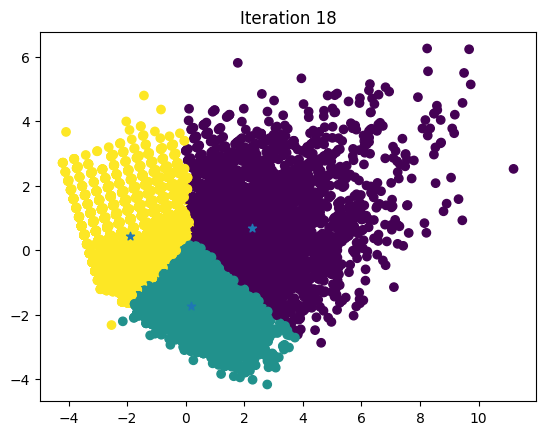

In [44]:
max_iterations = 100
k = 3

centroids = random_centropids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)

  centroids = new_centroids(data, labels, k)

  plot_clusters(data, labels, centroids, iteration)

  iteration += 1

In [45]:
centroids

,0,1,2
overall,4.666886,2.047290,2.016977
potential,5.109214,4.029826,2.099967
value_eur,1.464140,1.092811,1.043378
wage_eur,1.742782,1.140926,1.122403
age,4.534763,3.174017,5.501432


In [48]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
1968,G. Pandev,74.0,74.0,1400000.0,13000.0,37.0
1970,S. Viera,74.0,74.0,475000.0,2000.0,38.0
2243,Nilson Alfarinho,74.0,74.0,475000.0,15000.0,37.0
2430,M. Liendl,73.0,73.0,1200000.0,11000.0,35.0
2431,Mikel Rico,73.0,73.0,950000.0,8000.0,36.0
...,...,...,...,...,...,...
11673,A. Yamga,64.0,67.0,800000.0,3000.0,24.0
11676,A. Palić,64.0,64.0,375000.0,2000.0,33.0
11688,M. Lercher,64.0,68.0,750000.0,3000.0,25.0
11690,J. Colina,64.0,64.0,200000.0,500.0,34.0


In [49]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [53]:
centroids = kmeans.cluster_centers_

In [54]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,2.221885,5.122110,2.400427
potential,2.297877,5.484142,4.317993
value_eur,1.046802,1.691226,1.109602
wage_eur,1.140653,2.050993,1.188499
age,5.544034,4.857283,3.293153
